<a href="https://colab.research.google.com/github/RaffaNimir/Match-Up-recruiter-/blob/main/(2)_Matchup_Recruiter_data_learning_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('all')

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
import pandas as pd
import numpy as np
import spacy
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.util import ngrams
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# download necessary nltk resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string

# download required nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
jobs = pd.read_csv("jobs.csv")
jobs.sample(5)

,job_ID,job_title,domain,company_name,location,job_description,salary
12338,12339,Data Integration Architect,Information Technology,"Sunrise Systems, Inc.\n3.7","San Diego, CA",Sunrise System Inc. is currently looking for D...,88K-140K (Glassdoor est.)
5258,5259,Data Scientist,math jobs,Genesis10,Charlotte,Genesis10 is currently seeking a Data Scientis...,0
5928,5929,Data Scientist II,Engineering-or-architecture,"7-Eleven 10,375 reviews",Irving,Overview\n\nWho we are\n\nImagine working in a...,0
13641,13642,Senior Data Engineer - C3.ai,-1,Skiltrek,"Jacksonville, FL",Position Title: Senior Data Engineer - C3.ai\n...,66K-130K (Glassdoor est.)
9713,9714,Data Scientist/ML Expert - Digital Factory,production jobs,Price Water House Coopers,Tampa,Our Global Delivery Model Services team is res...,0


In [ ]:
# drop rows with missing values in the 'job_description' column
jobs.dropna(subset=['job_description'], inplace=True)

In [ ]:
from nltk.stem import PorterStemmer

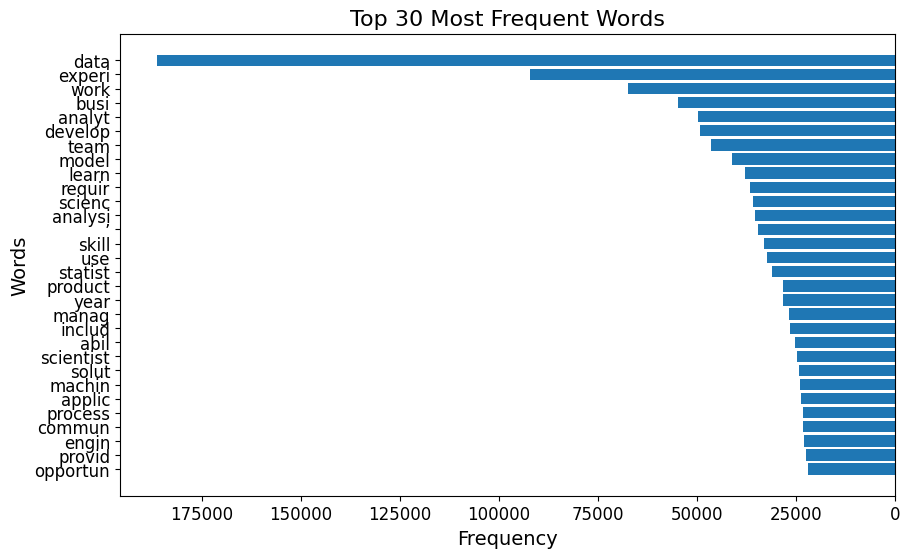

In [ ]:
# initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# define function to preprocess text
def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    
    # remove whitespace
    text = text.strip()
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # tokenize the document
    tokens = nltk.word_tokenize(text)
    
    # remove stop words
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # apply lemmatization to each token
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # apply stemming to each token
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

# apply preprocessing to the job_description column
preprocessed_text = []
for doc in jobs['job_description']:
    preprocessed_text.append(preprocess_text(doc))

    
# count word frequencies
word_freq = Counter([token for doc in preprocessed_text for token in doc])

# get the top 30 most frequent words and their counts
top_words = word_freq.most_common(30)

# visualize the highest mentioned words
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh([word[0] for word in top_words], [word[1] for word in top_words])
ax.invert_yaxis()
ax.invert_xaxis() # flip x-axis
ax.tick_params(axis='both', labelsize=12) # increase font size of tick labels
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Words', fontsize=14)
ax.set_title('Top 30 Most Frequent Words', fontsize=16)
plt.show()

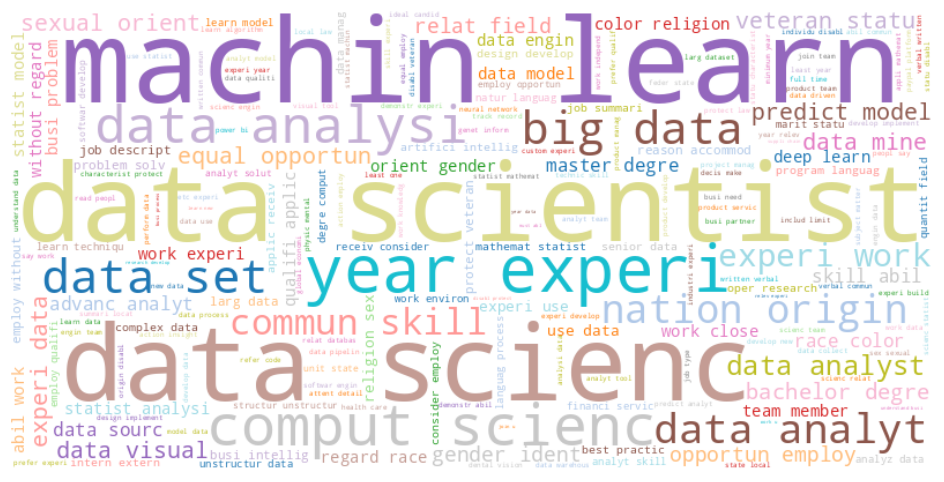

In [ ]:
# generate a larger word cloud with custom colors
wordcloud = WordCloud(background_color='white', width=800, height=400, colormap='tab20').generate(' '.join([token for doc in preprocessed_text for token in doc]))

# display the word cloud
plt.figure(figsize=(12, 6))  # adjust figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# extract the bigrams and trigrams
bigrams = Counter(list(ngrams([token for doc in preprocessed_text for token in doc], 2)))
trigrams = Counter(list(ngrams([token for doc in preprocessed_text for token in doc], 3)))

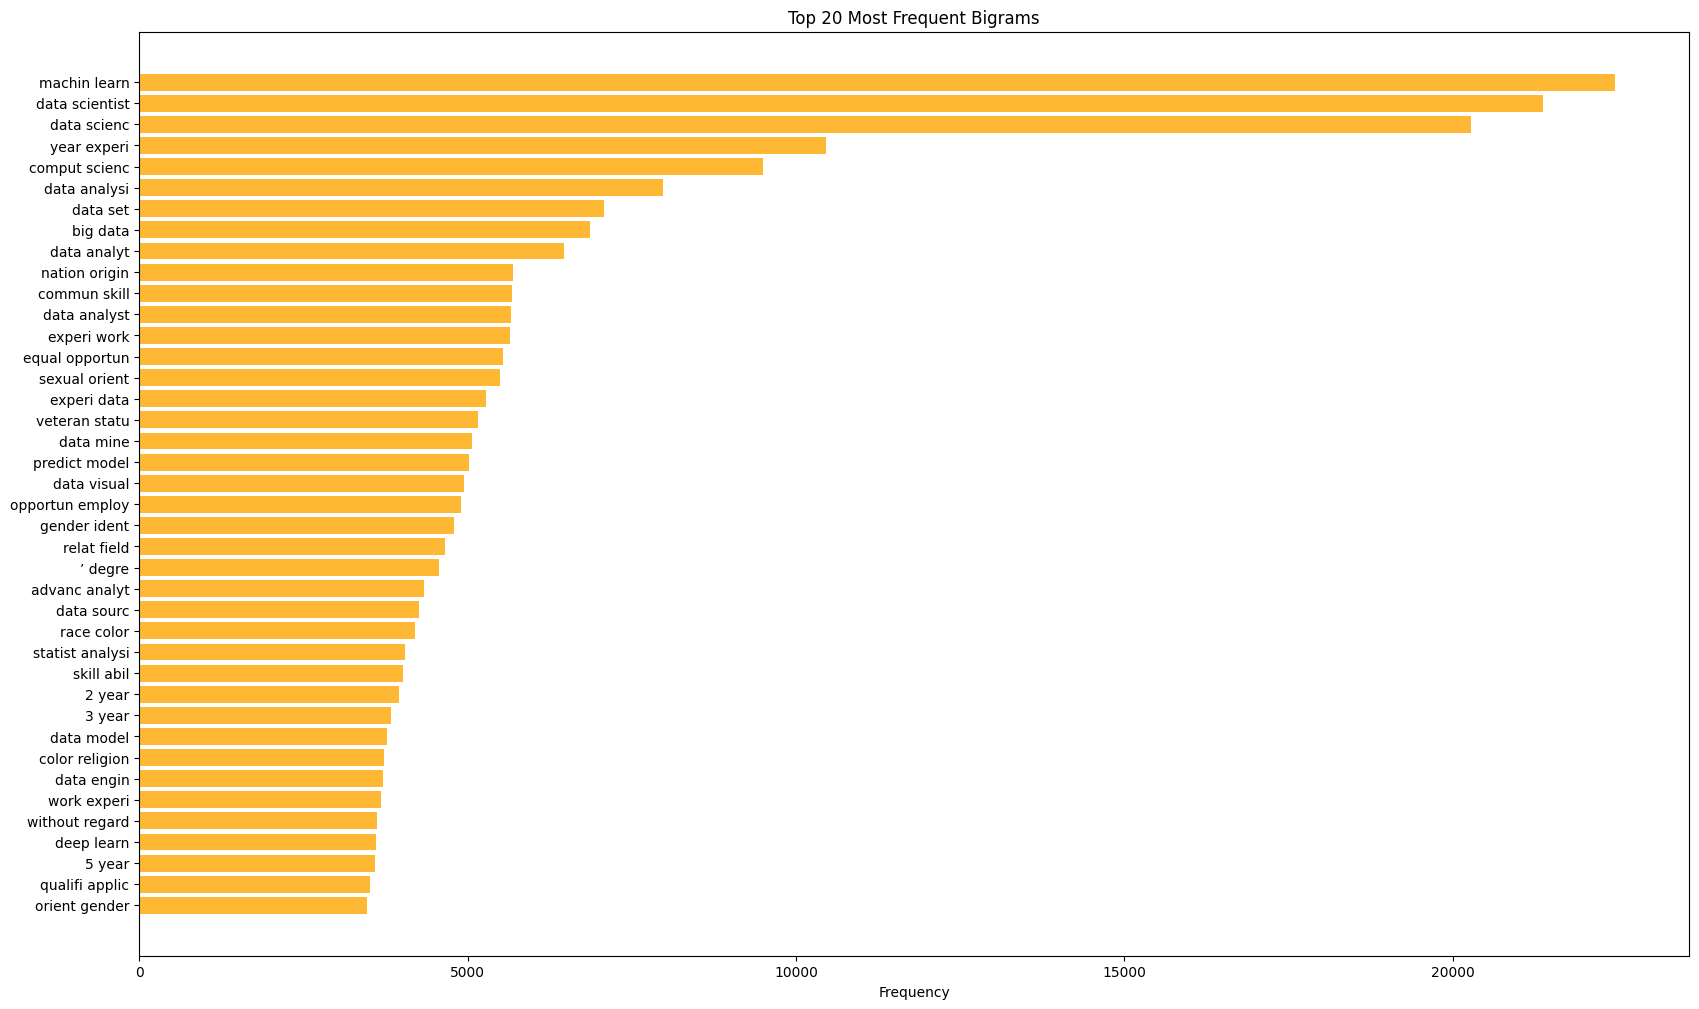

In [ ]:
# visualize the highest mentioned bigrams
fig, ax = plt.subplots(figsize=(20, 12))
ax.barh([' '.join(bigram) for bigram, freq in bigrams.most_common(40)],
        [freq for bigram, freq in bigrams.most_common(40)],color='#FFB833')
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Top 20 Most Frequent Bigrams')
plt.show()

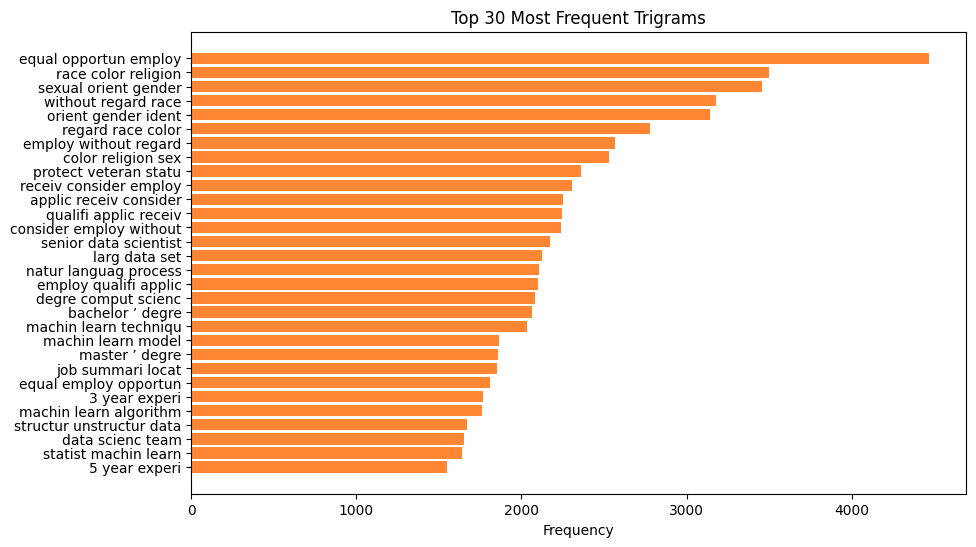

In [ ]:
# visualize the highest mentioned trigrams
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh([' '.join(trigram) for trigram, freq in trigrams.most_common(30)],
        [freq for trigram, freq in trigrams.most_common(30)], color = "#FF8633")
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Top 30 Most Frequent Trigrams')
plt.show()

In [ ]:
# perform LDA topic modeling
dictionary = Dictionary(preprocessed_text)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_text]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)

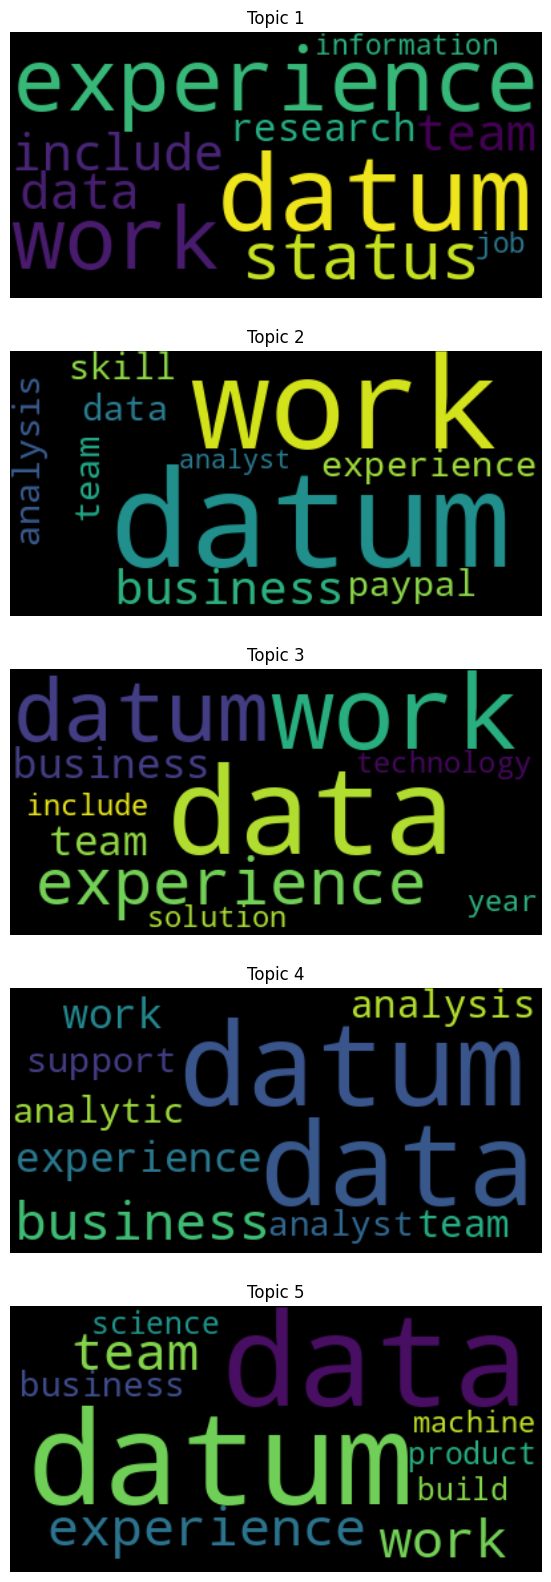

In [ ]:
# visualize the LDA topics
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    topic_words = [word for word, prob in topics[i][1]]
    wordcloud = WordCloud().generate(' '.join(topic_words))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {i+1}')
    ax.axis('off')
plt.show()